In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
flights = pd.read_csv('nycflights.csv', dtype = {'dep_time' : object, 
                                                 'dep_delay': object, 
                                                 'arr_time' : object, 
                                                 'arr_delay': object, 
                                                 'air_time' : object})
flights['date'] = pd.to_datetime({'year':flights.year, 'month':flights.month, 'day':flights.day})
def convert_time(column_name):
    the_min = flights[column_name][ flights[column_name].notnull() ].astype(str).str[-2:  ]
    the_hr  = flights[column_name][ flights[column_name].notnull() ].astype(str).str[  :-2]
    date_time = pd.to_datetime({'year':flights.year, 'month':flights.month, 'day':flights.day, 
                                'hour': the_hr, 'minute': the_min})
    return date_time
dep_date_time = convert_time('dep_time')
sched_dep_date_time = convert_time('sched_dep_time')
arr_date_time       = convert_time('arr_time')
sched_arr_date_time = convert_time('sched_arr_time')
datetimes = pd.concat({'dep_date_time': dep_date_time,
           'sched_dep_date_time': sched_dep_date_time, 
           'arr_date_time':arr_date_time, 
           'sched_arr_date_time':sched_arr_date_time}, axis = 1)
flights = flights.join(datetimes)  # we use the .join() function
flights = flights.drop(['year','month','day'], axis = 1)
airlines = pd.read_csv('airlines.csv', index_col = 'carrier')

### Which day of the week is busiest?

In [10]:
w = flights.groupby(dep_date_time.dt.weekday).date.count()  # monday = 0, sunday = 6
w

0.0    49311
1.0    49176
2.0    48755
3.0    48487
4.0    48558
5.0    37854
6.0    45499
Name: date, dtype: int64

In [11]:
d = pd.DataFrame(w)
# rename the index with a dictionary
d.rename({0:'Mon', 1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}, axis = 'index', inplace = True)

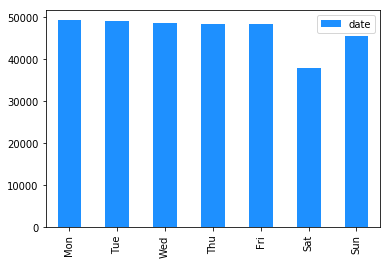

In [12]:
d.plot(kind = 'bar', color = 'dodgerblue')
plt.show()

In [14]:
flights.groupby(dep_date_time.dt.weekday_name).date.count()

Friday       48558
Monday       49311
Saturday     37854
Sunday       45499
Thursday     48487
Tuesday      49176
Wednesday    48755
Name: date, dtype: int64

In [24]:
flights.groupby(dep_date_time.dt.day_name('spanish')).date.count()  # I later learned of day_name()
# you need to specify the language to use

Domingo      45499
Jueves       48487
Lunes        49311
Martes       49176
Miércoles    48755
Sábado       37854
Viernes      48558
Name: date, dtype: int64

### Which carriers fly out of which airports?

In [ ]:
flights.groupby(['carrier','origin']).flight.count()

You can make a 'pivot table' by unstacking the multi-index

In [ ]:
flights.groupby(['carrier','origin']).flight.count().unstack()

You can also make a pivot table using the pivot_table method.

In [ ]:
flights.pivot_table('flight',index = 'carrier', columns = 'origin', aggfunc = 'count')

In [ ]:
flights.pivot_table('flight',index = 'carrier', 
                    columns = 'origin', aggfunc = 'count').plot.bar(stacked = True)

You can see the top 4 carriers: B6, DL, EV, UA

It appears:
- B6 flies out of JFK the most.
- DL uses JFK and LGA equally
- EV uses EWR heavily
- UA uses EWR heavily as well


I'm curious to see for each of the airports, if one of the carriers will have more 'clout' because it is a bigger user of the airport.

In [ ]:
ewr = flights.loc[flights.origin == 'EWR'].groupby('carrier').flight.count().sort_values(ascending = False)
ewr

### Let's look at flights to Los Angeles

In [ ]:
la = flights.loc[flights.dest.isin(['LAX','BUR','ONT','LGB'])]

In [ ]:
la.dest.unique()

In [ ]:
la.dest.value_counts()

In [ ]:
la.carrier.value_counts()

In [ ]:
la.groupby('dest').carrier.value_counts()

B6 (JetBlue) is the only carrier that goes to Burbank or Long Beach. There are no flights from Ontario to New York.

In [ ]:
la.groupby('dest').origin.value_counts()

No direct flights from LaGuardia to Los Angeles. If you want to fly direct to Burbank or Long Beach, you must depart from JFK. 

In [ ]:
la.dep_delay[la.dep_delay.notnull()].astype(int).groupby(la.dest).mean()